# Facebook 开源时间序列预测模型Prophet
Weina Ma - January 29, 2018

* Prophet是Facebook于2017年2月开源的一款支持python和R的大规模时序预测工具
* 趋势预测+趋势分解
* 突变点识别+调整
* 异常值/离群值检测

https://github.com/facebook/prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [40]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib as plt

In [35]:
df = pd.read_csv('../arima/201801.csv', header=None)
df.columns = ['ds', 'y']
#df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2018-01-05 00:00,674.0
1,2018-01-05 00:10,660.0
2,2018-01-05 00:20,536.0
3,2018-01-05 00:30,468.0
4,2018-01-05 00:40,449.0


In [36]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [37]:
future = m.make_future_dataframe(freq='H',periods=48)
future.tail()

,ds
1823,2018-01-19 12:40:00
1824,2018-01-19 13:40:00
1825,2018-01-19 14:40:00
1826,2018-01-19 15:40:00
1827,2018-01-19 16:40:00


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1823,2018-01-19 12:40:00,6897.267353,5985.772746,7770.038826
1824,2018-01-19 13:40:00,6795.338529,5839.210806,7669.230980
1825,2018-01-19 14:40:00,7186.043121,6276.418035,8184.555094
1826,2018-01-19 15:40:00,7557.389530,6619.823617,8498.097932
1827,2018-01-19 16:40:00,7368.909984,6400.100655,8334.344693


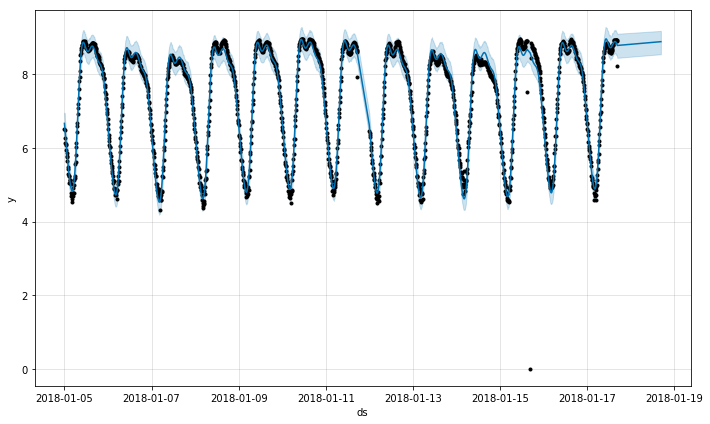

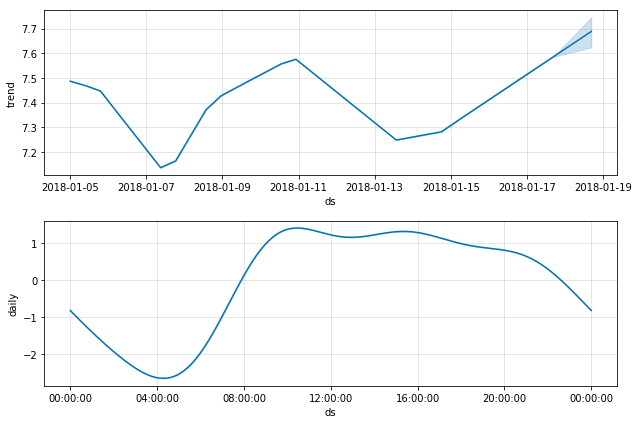

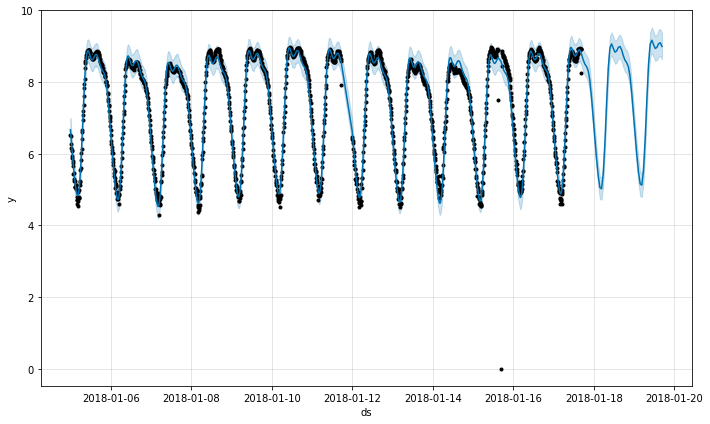

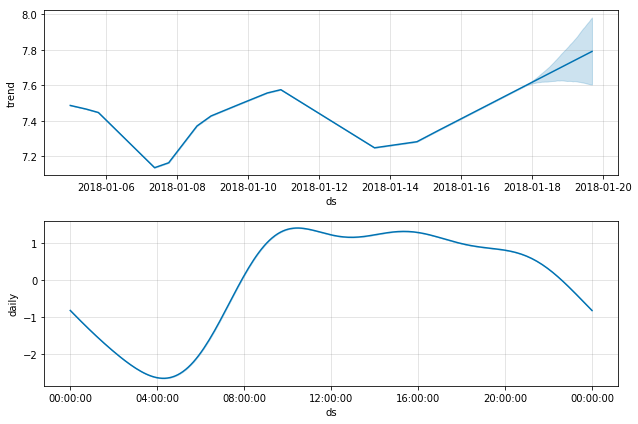

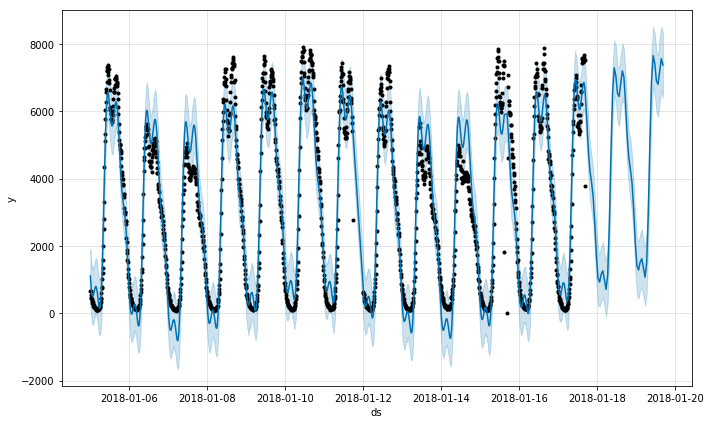

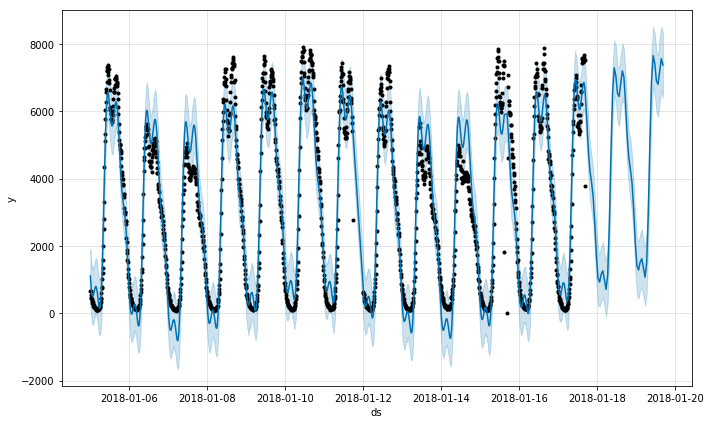

In [41]:
m.plot(forecast)
plt.pyplot.show()